#### GBM image post-processing
##### 1st May 2023
##### 2nd May ; plots as subplots (red dots), create typing class, 
##### 3rd May : updated both the typing classes, generated one set of figures for 1st image
##### 8th May : cleaned the plots
##### 19th May: Re-arraged cells, re-coded amp_code and cell_type_code, changed color scheme, added mutation_status_code group, edited size of dots
##### 21st May: y-axis inversion of plots to match image coordinates.
##### 10th June: loop across all images
##### 11th June: single-view clustering and compacting
##### 12th June: Github upload
##### 13th June: single cell resolution code, arrange file names
##### 15th June: combine data, plotting, Github

In [279]:
### added phenograph install
!pip install PhenoGraph 
import numpy as np
import pandas as pd
import scipy.integrate
import math
import matplotlib.pyplot as plt
import seaborn as sns
import phenograph
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
import time
import multiprocessing as mp
import os

from scipy.stats import zscore

#from sklearn.manifold import TSNE
#from sklearn.mixture import BayesianGaussianMixture
from openTSNE import TSNE



import phenograph as pg
import random

from matplotlib.lines import Line2D


[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [280]:
import matplotlib.colors as mcolors

mcolors.BASE_COLORS #these colors can be called with a single character

mcolors.TABLEAU_COLORS #the default color cycle colors

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

In [281]:
'''
find . | grep .git | xargs rm -rf
find . -name ".DS_Store" -delete
'''

'\nfind . | grep .git | xargs rm -rf\nfind . -name ".DS_Store" -delete\n'

In [424]:
colours_30 = ["gainsboro", "crimson","gold", "dodgerblue","darkorange","darkviolet","seagreen","lightpink"]
colours_31 = ["whitesmoke","silver", "orange","chocolate", "yellowgreen","forestgreen","darkkhaki","darkolivegreen",
            "pink","hotpink"]
colours_32 = ["gainsboro", "maroon"]
colours_33 = ["cadetblue","saddlebrown","slategrey","powderblue",
            "palevioletred","mediumvioletred","yellowgreen","lemonchiffon","chocolate",
              "lightsalmon","lightcyan","lightblue", "darkorange","magenta","sienna","midnightblue","tomato","tomato","aqua",
             "darkslategray","coral","lightcoral","sandybrown","indianred","olivedrab","darkgreen","blueviolet","forestgreen","darkred",
             "dimgray","teal","mistyrose"]
colours_41 = ["cadetblue","saddlebrown","slategrey","powderblue",
            "palevioletred","mediumvioletred","yellowgreen","lemonchiffon","chocolate",
              "lightsalmon","lightcyan","lightblue", "darkorange","magenta","sienna","midnightblue","tomato","tomato","aqua",
             "darkslategray","coral","lightcoral","sandybrown","indianred","olivedrab","darkgreen","blueviolet","forestgreen","darkred",
             "dimgray","teal","mistyrose","gainsboro", "crimson","gold", "dodgerblue","darkorange","darkviolet","seagreen","lightpink","darkred",
             "darkkhaki","lightviolet","burlywood","palegoldenrod"]

In [304]:
##necessary paths
data_path = '/Users/4470526/Downloads/Projects/GBM_SCRIPPS/ImageAnalysis_Moffitt_Complete/'
loc='all_count_matrices/'
data_path_output = '/Users/4470526/Downloads/Projects/GBM_SCRIPPS/ImageAnalysis_Moffitt_Complete/output/sc/'


In [305]:
gn_list = []
pn_list = []
mn_list = []

In [285]:
#data_path = 'C:\\Users\\ugoma\\Dropbox (Scripps Research)\\Janiszewska Lab\\Ugoma_JaniszewskaLab\\Projects\\ImageAnalysis_Moffitt_Complete\\'
#name = 'CM_Case05RecuA2_Broad'
#count_matrix =  np.array(pd.read_csv(os.path.join(data_path+name+'.csv'), header=0,index_col=None)) 

In [286]:
### Genotyping classification: Changed to specifically categorize, single, double and triple amplifiation including equivocal. 
### Removed Equivocal class
### Ordered heirarchacally to avoid overlap with elif looping

amp_code = -1
def genotyping(r1):
    ##genotype wt and mut combined
          
    if (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) 
        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] ==0))) :
        amp_code = 0 #no amp C228T wt
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) 
        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] >=1))) :
        amp_code = 0 #no amp C228T mut     
    
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] ==0)) :
        amp_code = 1 #pdgfra amp C228T wt    
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] >=1)) :
        amp_code = 1 #pdgfra amp C228T mut
              
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] ==0)):
        amp_code = 2 #egfr amp C228T wt
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] >=1)):
        amp_code = 2 #egfr amp C228T mut       
   
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code = 3 #cdk4 amp C228T wt  
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code = 3 #cdk4 amp C228T mut
        
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,9] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] ==0)):
        amp_code = 4 #egfr + pdgfra amp C228T wt
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,9] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] >=1)):
        amp_code = 4 #egfr + pdgfra amp C228T mut
        
    
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code = 5 #cdk4 + pdgfra amp C228T wt
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code = 5 #cdk4 + pdgfra amp C228T mut

    elif (((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code = 6 #cdk4 + egfr amp C228T wt
    elif (((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code = 6 #cdk4 + egfr amp C228T mut

    elif (((count_matrix[r1,3] >=6) or (count_matrix[r1,9] >=7)) and 
          ((count_matrix[r1,4] >=6) or (count_matrix[r1,10] >=7)) and 
          ((count_matrix[r1,5] >=6) or (count_matrix[r1,11] >=7)) and (count_matrix[r1,6] ==0)) :
        amp_code = 7 #all amp C228T wt      
    elif (((count_matrix[r1,3] >=6) or (count_matrix[r1,9] >=7)) and 
          ((count_matrix[r1,4] >=6) or (count_matrix[r1,10] >=7)) and 
          ((count_matrix[r1,5] >=6) or (count_matrix[r1,11] >=7)and (count_matrix[r1,6] >=1))) :
        amp_code = 7 #all amp C228T mut
        
    return(amp_code)

geno_labels=['No amp','PDGFRA amp','EGFR amp','CDK4 amp','PDGFRA + EGFR amp','CDK4 + PDGFRA amp',
             'CDK4 + EGFR amp','CDK4 + EGFR + PDGFRA amp']

In [ ]:
'''
### Function to identify amplified cells WITH mutations

amp_code2 = -4
def genotyping2(r1):
    ##genotype mut
          
    if (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) 
        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] >=1))) :
        amp_code2 = 0 #no amp C228T mut
      
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] >=1)) :
        amp_code2 = 1 #pdgfra amp C228T mut  
                 
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] >=1)):
        amp_code2 = 2 #egfr amp C228T mut
   
   
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code2 = 3 #cdk4 amp C228T mut  
         
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,9] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] >=1)):
        amp_code2 = 4 #egfr + pdgfra amp C228T mut
     
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code2 = 5 #cdk4 + pdgfra amp C228T mut

    elif (((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] >=1)):
        amp_code2 = 6 #cdk4 + egfr amp C228T mut

    elif (((count_matrix[r1,3] >=6) or (count_matrix[r1,9] >=7)) and 
          ((count_matrix[r1,4] >=6) or (count_matrix[r1,10] >=7)) and 
          ((count_matrix[r1,5] >=6) or (count_matrix[r1,11] >=7)and (count_matrix[r1,6] >=1))) :
        amp_code2 = 7 #all amp C228T mut
    
    return(amp_code2)

geno2_labels=['No amp','PDGFRA amp','EGFR amp','CDK4 amp','PDGFRA + EGFR amp','CDK4 + PDGFRA amp',
             'CDK4 + EGFR amp','CDK4 + EGFR + PDGFRA amp']'''

In [ ]:
'''
### function to identify amplified cells WITHOUT TERT C228T mutations


amp_code2 = -4
def genotyping2(r1):
    ##genotype wt
          
    if (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,5] <6) 
        and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7) and (count_matrix[r1,6] ==0))) :
        amp_code2 = 0 #no amp C228T wt
          
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,4] <6) and (count_matrix[r1,9] <7) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and (count_matrix[r1,6] ==0)) :
        amp_code2 = 1 #pdgfra amp C228T wt    
              
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,9] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] ==0)):
        amp_code2 = 2 #egfr amp C228T wt
   
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,5] < 6) and (count_matrix[r1,10] <7) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code2 = 3 #cdk4 amp C228T wt 
            
    elif (((count_matrix[r1,3] <6) and (count_matrix[r1,9] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,4] < 6) and (count_matrix[r1,10] <7)) and (count_matrix[r1,6] ==0)):
        amp_code2 = 4 #egfr + pdgfra amp C228T wt
        
    elif (((count_matrix[r1,4] <6) and (count_matrix[r1,10] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code2 = 5 #cdk4 + pdgfra amp C228T wt

    elif (((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7)) and 
          not((count_matrix[r1,5] <6) and (count_matrix[r1,11] <7) and (count_matrix[r1,3] < 6) and (count_matrix[r1,9] <7)) and (count_matrix[r1,6] ==0)):
        amp_code2 = 6 #cdk4 + egfr amp C228T wt
 
    elif (((count_matrix[r1,3] >=6) or (count_matrix[r1,9] >=7)) and 
          ((count_matrix[r1,4] >=6) or (count_matrix[r1,10] >=7)) and 
          ((count_matrix[r1,5] >=6) or (count_matrix[r1,11] >=7)) and (count_matrix[r1,6] ==0)) :
        amp_code2 = 7 #all amp wt
        
    return(amp_code2)

geno2_labels=['No amp','PDGFRA amp','EGFR amp','CDK4 amp','PDGFRA + EGFR amp','CDK4 + PDGFRA amp',
             'CDK4 + EGFR amp','CDK4 + EGFR + PDGFRA amp']'''


In [289]:
### function to identify different cell types in the microenvironment
# phenotyping

cell_type_code = -2
def phenotyping(r1, amp_code):
    ##Unclassified TME
    if ((amp_code ==0) and (count_matrix[r1,6]==0) and
        (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 0 # unclassified TME cell
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 1 # unclassified TME cell, hypoxic
    
    ##Immune Cell Definitions      
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 2 # immune cell
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 2 # immune cell
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 3 # hypoxic immune cell
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 3 # hypoxic immune cell
    
    ##Endothelial Cell Definitions
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 4 # endothelial cell
    elif (amp_code ==0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 5 # hypoxic endothelial cell
    
    ##Tumor Cell Definitions
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 6 # TERT mutant GBM cell, EC mimicry
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 6 # GBM cell, C228T wt, EC mimicry
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 7 # Hypoxic TERT mutant GBM cell, EC mimicry
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 7 # Hypoxic GBM cell, C228T wt, EC mimicry
    
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 8 # GBM cell, TERT mutant
    elif (amp_code >0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]==0)):
        cell_type_code = 8 # GBM cell, C228T wt
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 9 # Hypoxic GBM cell,TERT mutant 
    elif (amp_code >0 and (count_matrix[r1,6]==0) and 
          (count_matrix[r1,12]==0) and (count_matrix[r1,13]==0) and (count_matrix[r1,14]>0)):
        cell_type_code = 9 # Hypoxic GBM cell, C228T wt    

    ## previously NA label re-catagorized based on dominating phenotype 
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 6 # NA (GBM cell, TERT mutant, EC mimicry)
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 7 # NA (Hypoxic GBM cell, TERT mutant, EC mimicry)
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 8 # NA (GBM cell, C228T wt)
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 8 # NA (GBM cell, TERT mutant)    
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]==0)):
        cell_type_code = 8 # NA (GBM cell, C228T wt)
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]>0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 9 # NA (Hypoxic GBM cell, C228T wt)   
    elif (amp_code >0 and (count_matrix[r1,6]==0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 9 # NA (Hypoxic GBM cell, C228T wt)
    elif ( (count_matrix[r1,6]>0) and (count_matrix[r1,12]==0) and (count_matrix[r1,13]>0) and (count_matrix[r1,14]>0)):
        cell_type_code = 9 # NA (Hypoxic GBM cell,TERT mutant)

    return(cell_type_code)


pheno_labels = ['Unclassified TME','Hypoxic Unclassified TME','Immune','Hypoxic Immune','Endothelial','Hypoxic Endothelial',
                  'EC Mimicry Tumor Cell','Hypoxic EC Mimicry Tumor Cell', 'Tumor Cell',
                  'Hypoxic Tumor Cell']

In [299]:
### function to differentiate TERT mutation positive from TERT mutation negative cells
# mutation status
mutation_status_code = -3
def mutation(r1):
    if ((count_matrix[r1,6]>0)):
        mutation_status_code = 1 # TERT mutant GBM cell
      
    else:
        mutation_status_code = 0 # C228T wt, GBM
      
    return(mutation_status_code)
mut_labels = ['TERT C228T wt','TERT C228T mut']
    

In [292]:


colors = colours_30[0:9]
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = geno_labels

colors_p = colours_31[0:18]
lines_p = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors_p]
labels_p = pheno_labels

colors_m = colours_32[0:9]
lines_m = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors_m]
labels_m = mut_labels

In [319]:
sorted(os.listdir(data_path+loc))

['CM_Case01PrimA1_Broad.csv',
 'CM_Case01RecuB1_Broad.csv',
 'CM_Case02PrimB3_Broad.csv',
 'CM_Case02RecuA1_Broad.csv',
 'CM_Case03PrimB2_Broad.csv',
 'CM_Case03RecuA1_Broad.csv',
 'CM_Case04PrimB1_Broad.csv',
 'CM_Case04RecuB2_Broad.csv',
 'CM_Case05PrimB3_Broad.csv',
 'CM_Case05RecuA2_Broad.csv',
 'CM_Case06PrimA1_Broad.csv',
 'CM_Case06RecuB1_Broad.csv',
 'CM_Case07PrimA5_Broad.csv',
 'CM_Case07RecuA1_Broad.csv',
 'CM_Case08PrimB2_Broad.csv',
 'CM_Case08RecuC1_Broad.csv',
 'CM_Case09PrimA1_Broad.csv',
 'CM_Case09RecuA4_Broad.csv']

In [330]:
### code to loop over each count matrix

count = 0
fname_list = [] #list of file names in the order they are read
image_id_list = [] #integer mapping of file names 
num_cells = 0

geno_data_all = np.zeros((1,8))
pheno_data_all = np.zeros((1,10))
muta_data_all = np.zeros((1,2))

for fname in sorted(os.listdir(data_path+loc)):  
    print('reading file '+ str(count))
    print(fname)
    fname_list.append(fname)
    
    count_matrix =  np.array(pd.read_csv(os.path.join(data_path + loc+fname), header=0,index_col=None)) 
    
    print (count_matrix.shape)
    
    ## replace nan with 0
    count_matrix[np.isnan(count_matrix)] = 0
    
    geno_data = np.zeros([count_matrix.shape[0],8])
    pheno_data = np.zeros([count_matrix.shape[0],10])
    muta_data = np.zeros([count_matrix.shape[0],2])
    
    im_num, count_im_num = np.unique(count_matrix[:,0],return_counts=True)
    
    num_cells = num_cells + count_matrix.shape[0]
    
    ## collect the lists per CM
    geno_list = []
    pheno_list = []
    mut_list = []

    for r1 in range(count_matrix.shape[0]):
        #print('row',r1)    
        ac = genotyping(r1) #genotyping function returns the amp_code value (ac = amp_code)
        #print("ac=",ac)
        geno_list.append(ac)  #an array of the amp_code value for each row of the data table
        geno_data[r1,ac]=1
            
        ct = phenotyping(r1,ac) 
        #print("ct=",ct)
        pheno_list.append(ct) #an array of the cell_type_code for each row and a given amp_code
        pheno_data[r1,ct]=1
        
        mt = mutation(r1) 
        #print("mt=",mt)
        mut_list.append(mt) #an array of the mutation_status_code for each row
        muta_data[r1,mt]=1
        
     
    geno_data_all = np.concatenate((geno_data_all,geno_data),axis=0)
    pheno_data_all = np.concatenate((pheno_data_all,pheno_data),axis=0)
    muta_data_all = np.concatenate((muta_data_all,muta_data),axis=0)
    
    count = count + 1  
    ##Added a scatter plot and a bar plot to show spatial distriubution of TERT C228T positive nuclei
    ##Added the line plt.gca().invert_yaxis() to invert why axis count which mirrors orientation of fluorescent images


    ## merge geno and phenotypes 




    #im1 = [1]


'''
    ## for each FoV in that count matrix
    for im in im_num:
        image_id_list.append(count) # to collect image id
        
        print('image '+str(im))
        ii = np.int64(im)

        fig = plt.figure(figsize=(15,10),dpi=500)
        plt.title(fname+'_'+str(ii))

        s1 = np.where(np.array(count_matrix[:,0])==im)


        #####
        #####
        plt.subplot(2,3,2)
        geno_colr = np.array(geno_list)[s1]
        #color_s1 = colours_30
        area = np.round(np.sqrt(count_matrix[ s1, 2]/np.pi),0)*4
        plt.scatter(count_matrix[ s1, 7], count_matrix[ s1, 8], color=np.array(colors)[geno_colr],
                    s=50,linewidths=0,alpha=0.8)#, label= labels[s1])
        plt.gca().invert_yaxis()
        plt.axis('on')
        #plt.legend()
        colors = colours_30[0:9]
        lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
        labels = geno_labels
        plt.legend(lines, labels,fontsize='x-small',loc='center right', bbox_to_anchor=(2.8,-0.3))
        plt.title('Genotype diversity')
        
        #####
        #####
        plt.subplot(2,3,5)
        n , c= np.unique(geno_colr,return_counts=True)
        gn = np.zeros(len(geno_labels))
        for i,j in enumerate(n):
            #print(j)
            gn[j]=np.int64(c[i])
        gn = np.array(gn)
        #print(gn) 
        X_axis = np.arange(len(geno_labels))
        X=y_marker = geno_labels
        plt.bar(X_axis, gn, 0.3, label = y_marker,color=colors)
        plt.xticks(X_axis, X,rotation=90,fontsize='small')
        plt.xlabel("Genotypes")
        plt.ylabel("Distribution (# of cells)")
        plt.title("Cell distribution in each genotype")

        
        #####
        #####
        plt.subplot(2,3,1)
        pheno_colr = np.array(pheno_list)[s1]
        plt.scatter(count_matrix[ s1, 7], count_matrix[ s1, 8], color=np.array(colors_p)[pheno_colr],
                    s=50,linewidths=0,alpha=0.8)# ,label= np.array(colours_30)[pheno_colr] )
        plt.gca().invert_yaxis()
        plt.axis('on')
        plt.title('Phenotypic diversity')
        colors_p = colours_31[0:18]
        lines_p = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors_p]
        labels_p = pheno_labels
        plt.legend(lines_p, labels_p,fontsize='x-small',loc='upper left', bbox_to_anchor=(3.45, 0.7))

        #####
        #####        
        plt.subplot(2,3,4)
        n , c= np.unique(pheno_colr,return_counts=True)
        pn = np.zeros(len(pheno_labels))
        for i,j in enumerate(n):
            #print(j)
            pn[j]=np.int64(c[i])
        pn = np.array(pn)
        X_axis = np.arange(len(pheno_labels))
        X=y_marker = pheno_labels
        plt.bar(X_axis, pn, 0.3, label = y_marker,color=colors_p)
        plt.xticks(X_axis, X,rotation=90,fontsize='small')
        plt.xlabel("Phenotypes")
        plt.ylabel("Distribution (# of cells)")
        plt.title("Cell distribution in each phenotype")

        #####
        #####        
        plt.subplot(2,3,3)
        mut_colr = np.array(mut_list)[s1]
        plt.scatter(count_matrix[ s1, 7], count_matrix[ s1, 8], color=np.array(colors_m)[mut_colr],
                    s=50,linewidths=0,alpha=0.8)# ,label= np.array(colours_30)[pheno_colr] )
        plt.gca().invert_yaxis()
        plt.axis('on')
        plt.title('TERT C228T Distribution')
        colors_m = colours_32[0:9]
        lines_m = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors_m]
        labels_m = mut_labels
        plt.legend(lines_m, labels_m,fontsize='x-small',loc='center right', bbox_to_anchor=(1.415,-0.8))
       
        
        #####
        #####
        plt.subplot(2,3,6)
        n , c= np.unique(mut_colr,return_counts=True)
        mn = np.zeros(len(mut_labels))
        for i,j in enumerate(n):
            #print(j)
            mn[j]=np.int64(c[i])
        mn = np.array(mn)  
        X_axis = np.arange(len(mut_labels))
        X=y_marker = mut_labels
        plt.bar(X_axis, mn, 0.3, label = y_marker,color=colors_m)
        plt.xticks(X_axis, X,rotation=90,fontsize='small')
        plt.xlabel("Mutation Status")
        plt.ylabel("Distribution (# of cells)")
        plt.title("Cell distribution in each status")

        mn_list.append(mn)
        pn_list.append(pn)
        gn_list.append(gn)
        plt.savefig(data_path_output+'figures/'+fname+'_'+str(ii)+'_fig'+'.png',bbox_inches='tight')
'''




reading file 0
CM_Case01PrimA1_Broad.csv
(723, 15)
reading file 1
CM_Case01RecuB1_Broad.csv
(729, 15)
reading file 2
CM_Case02PrimB3_Broad.csv
(835, 15)
reading file 3
CM_Case02RecuA1_Broad.csv
(588, 15)
reading file 4
CM_Case03PrimB2_Broad.csv
(1648, 15)
reading file 5
CM_Case03RecuA1_Broad.csv
(1309, 15)
reading file 6
CM_Case04PrimB1_Broad.csv
(1005, 15)
reading file 7
CM_Case04RecuB2_Broad.csv
(879, 15)
reading file 8
CM_Case05PrimB3_Broad.csv
(835, 15)
reading file 9
CM_Case05RecuA2_Broad.csv
(812, 15)
reading file 10
CM_Case06PrimA1_Broad.csv
(1836, 15)
reading file 11
CM_Case06RecuB1_Broad.csv
(2614, 15)
reading file 12
CM_Case07PrimA5_Broad.csv
(1465, 15)
reading file 13
CM_Case07RecuA1_Broad.csv
(1336, 15)
reading file 14
CM_Case08PrimB2_Broad.csv
(700, 15)
reading file 15
CM_Case08RecuC1_Broad.csv
(1152, 15)
reading file 16
CM_Case09PrimA1_Broad.csv
(584, 15)
reading file 17
CM_Case09RecuA4_Broad.csv
(1227, 15)


'\n    ## for each FoV in that count matrix\n    for im in im_num:\n        image_id_list.append(count) # to collect image id\n        \n        print(\'image \'+str(im))\n        ii = np.int64(im)\n\n        fig = plt.figure(figsize=(15,10),dpi=500)\n        plt.title(fname+\'_\'+str(ii))\n\n        s1 = np.where(np.array(count_matrix[:,0])==im)\n\n\n        #####\n        #####\n        plt.subplot(2,3,2)\n        geno_colr = np.array(geno_list)[s1]\n        #color_s1 = colours_30\n        area = np.round(np.sqrt(count_matrix[ s1, 2]/np.pi),0)*4\n        plt.scatter(count_matrix[ s1, 7], count_matrix[ s1, 8], color=np.array(colors)[geno_colr],\n                    s=50,linewidths=0,alpha=0.8)#, label= labels[s1])\n        plt.gca().invert_yaxis()\n        plt.axis(\'on\')\n        #plt.legend()\n        colors = colours_30[0:9]\n        lines = [Line2D([0], [0], color=c, linewidth=3, linestyle=\'-\') for c in colors]\n        labels = geno_labels\n        plt.legend(lines, labels,fon

In [335]:
geno_data_all = np.delete(geno_data_all, (0), axis=0)
pheno_data_all = np.delete(pheno_data_all, (0), axis=0)
muta_data_all = np.delete(muta_data_all, (0), axis=0)

In [339]:
muta_data_all.shape

(20277, 2)

In [354]:
### save the matrices
df_data = pd.DataFrame(np.array(geno_data_all))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'geno_matrix.csv'), header=None, index=None)

df_data = pd.DataFrame(np.array(muta_data_all))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'muta_matrix.csv'), header=None, index=None)


df_data = pd.DataFrame(np.array(pheno_data_all))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'pheno_matrix.csv'), header=None, index=None)


#df_data = pd.DataFrame(np.array(image_id_list))
#df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'image_id_list.csv'), header=None, index=None)


df_data = pd.DataFrame(np.array(fname_list))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'file_names_list.csv'), header=None, index=None)


#### section 2: clustering (11th June 2023), Cluster using Phenograph/Leiden algorithm

In [355]:
### read the matrices

gn_data = pd.read_csv(os.path.join(data_path_output + '/cluster/'+'geno_matrix.csv'), index_col=None, header= None)
print(gn_data.shape)
gn_data = np.array(gn_data)
                   
pn_data = pd.read_csv(os.path.join(data_path_output + '/cluster/'+'pheno_matrix.csv'), index_col=None, header= None)
print(pn_data.shape)
pn_data = np.array(pn_data)
                   
                   
mn_data = pd.read_csv(os.path.join(data_path_output + '/cluster/'+'muta_matrix.csv'), index_col=None, header= None)
print(mn_data.shape)
mn_data = np.array(mn_data)

file_name_data = pd.read_csv(os.path.join(data_path_output + '/cluster/'+'file_names_list.csv'), index_col=None, header= None)
print(file_name_data.shape)
file_name_data = np.array(file_name_data)

#image_ids = pd.read_csv(os.path.join(data_path_output + '/cluster/'+'image_id_list.csv'), index_col=None, header= None)
#print(image_ids.shape)
#image_ids = np.array(image_ids).flatten()

(20277, 8)
(20277, 10)
(20277, 2)
(18, 1)


##### 1. geno clusters ##### notice this is not interpretable

In [9]:
'''
pip install scipy==1.4.1 --use-feature=2020-resolver
pip install Phenograph==1.5.7
pip install bhtsne
'''

'\npip install scipy==1.4.1 --use-feature=2020-resolver\npip install Phenograph==1.5.7\npip install bhtsne\n'

In [340]:
geno_data_all.shape

(20277, 8)

In [341]:
communities, graph, Q = pg.cluster(geno_data_all, min_cluster_size=1)#,k=500)
cluster_asgn_gn = communities

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 3.199716091156006 seconds
Jaccard graph constructed in 1.7317261695861816 seconds
Wrote graph to binary file in 0.5564899444580078 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.394592
Louvain completed 21 runs in 3.8909289836883545 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 9.64531397819519 seconds


In [345]:
M = zscore(geno_data_all, axis=0)

num_cells = M.shape[0]
num_genes = M.shape[1]

In [349]:
#tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=250)
X_2d_gn = TSNE().fit(M)


unique [0 1 2 3 4 5 6 7]


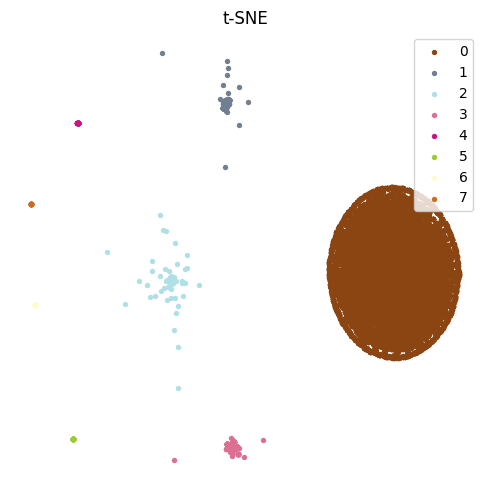

In [353]:
unique, counts = np.unique(cluster_asgn_gn, return_counts=True)
print('unique',str(unique))

#t-SNE plots
target_ids = range(len(unique))
plt.figure(figsize=(5,5),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    #print(label)
    c=colours_33[i+1]
    plt.scatter(X_2d_gn[ cluster_asgn_gn==(i), 0], X_2d_gn[ cluster_asgn_gn==(i), 1], color=c,label=label,s=15,linewidths=0)
plt.legend(loc=1)
plt.title('t-SNE')
#plt.show()
file_name = os.path.join(data_path_output + '/figures/'+'cluster_geno.png')
plt.savefig(file_name,dpi=150)

In [356]:
scaled_X = zscore(geno_data_all,axis=1)
y_marker = geno_labels

Genotype label spread


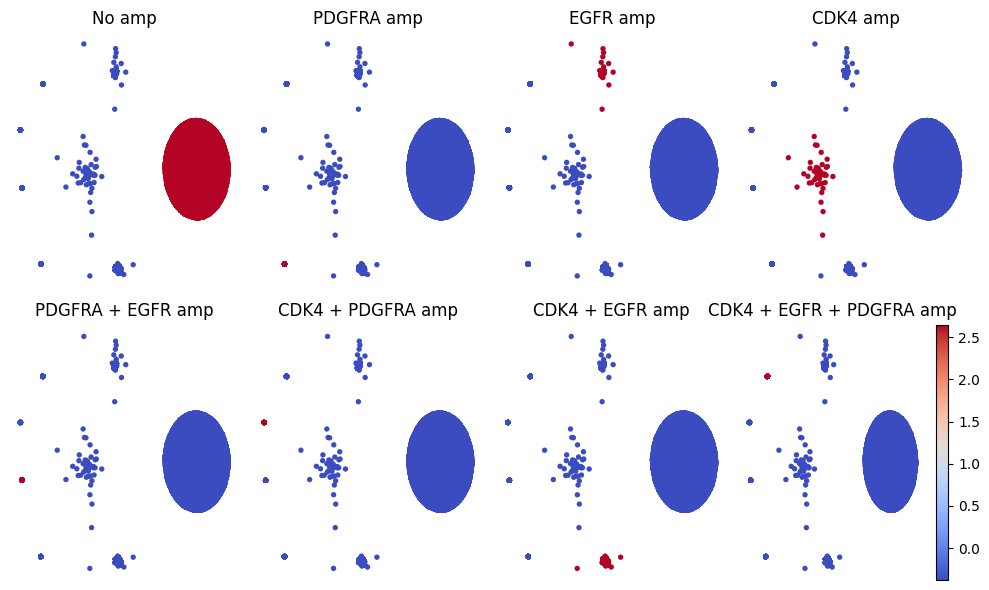

In [357]:


#tsne coloured based on genotype label spread


#t-SNE plots
print('Genotype label spread')
#plt.figure(100, figsize=(4,4),dpi=dpi_set)
#plt.axis('off')

cols = np.int64(len(geno_labels)/2)

fig = plt.figure()

for m in range(len(geno_labels)):
    
    ax1 = fig.add_subplot(2,cols,m+1)
    plt.scatter(X_2d_gn[:,0], X_2d_gn[:,1], c=scaled_X[:,m],   s=15,linewidths=0, cmap='coolwarm')
    plt.axis('off')
    plt.title(y_marker[m])
plt.colorbar()

file_name = os.path.join(data_path_output + '/figures/'+'geno_label_distribution.png')
plt.savefig(file_name,dpi=150)



In [358]:
df_data = pd.DataFrame(np.array(X_2d_gn))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'X2d_geno.csv'), header=None, index=None)

df_data = pd.DataFrame(np.array(cluster_asgn_gn))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'cluster_asgn_geno.csv'), header=None, index=None)


##### 2. pheno+geno+muta clusters


In [361]:
### combining the 3 matrices
matrix_all = np.concatenate((gn_data, pn_data, mn_data),axis=1) #dim = 8, 10, 2
print(matrix_all.shape)

(20277, 20)


In [362]:
communities, graph, Q = pg.cluster(matrix_all, min_cluster_size=1)#,k=500)
cluster_asgn_all = communities

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 10.099411964416504 seconds
Jaccard graph constructed in 1.334756851196289 seconds
Wrote graph to binary file in 0.49474620819091797 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.698499
Louvain completed 21 runs in 3.8898990154266357 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 16.088456869125366 seconds


In [363]:
M = matrix_all

num_cells = M.shape[0]
num_genes = M.shape[1]



In [364]:
#tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=250)
X_2d_all = TSNE().fit(M)


unique [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


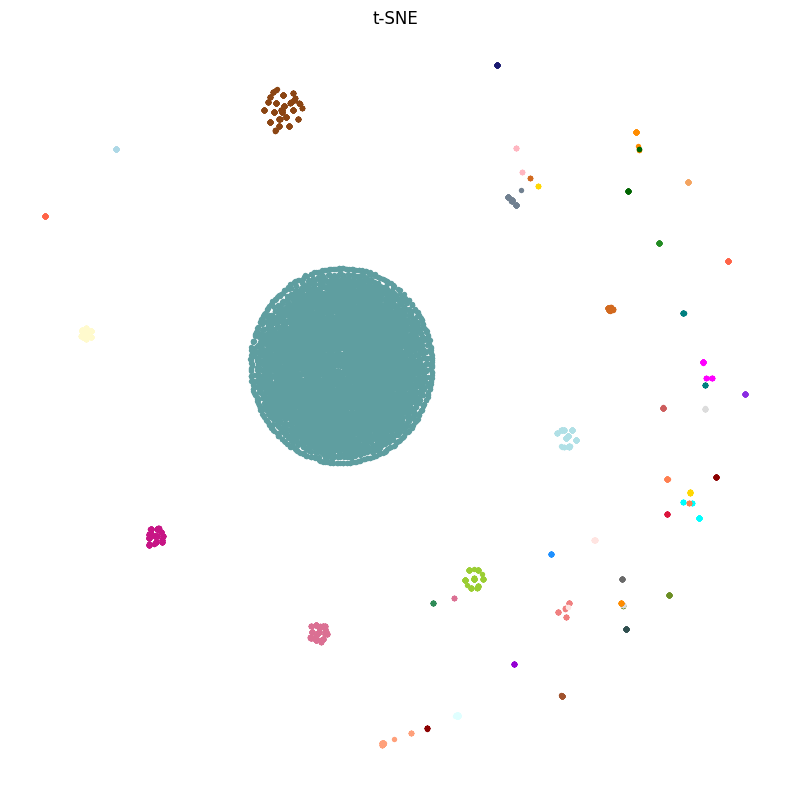

In [403]:
unique, counts = np.unique(cluster_asgn_all, return_counts=True)
print('unique',str(unique))

#t-SNE plots
target_ids = range(len(unique))
plt.figure(figsize=(8,8),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    #print(label)
    c=colours_41[i]
    plt.scatter(X_2d_all[ cluster_asgn_all==(i), 0], X_2d_all[ cluster_asgn_all==(i), 1], color=c,label=label,s=15,linewidths=0)
#plt.legend()
plt.title('t-SNE')
#plt.show()
file_name = os.path.join(data_path_output + '/figures/'+'cluster_all.png')
plt.savefig(file_name,dpi=150)

In [404]:
counts

array([10711,  1604,  1052,   829,   816,   791,   766,   585,   315,
         284,   243,   224,   221,   186,   169,   159,   124,   109,
         107,    98,    73,    69,    68,    63,    59,    54,    53,
          51,    49,    45,    42,    38,    32,    31,    29,    28,
          27,    27,    17,    15,    14])

In [397]:
scaled_X = zscore(matrix_all,axis=1)
y_marker = [geno_labels,pheno_labels,mut_labels]
flat_list = [item for sl in y_marker for item in sl]
print(flat_list)
y_marker=flat_list

['No amp', 'PDGFRA amp', 'EGFR amp', 'CDK4 amp', 'PDGFRA + EGFR amp', 'CDK4 + PDGFRA amp', 'CDK4 + EGFR amp', 'CDK4 + EGFR + PDGFRA amp', 'Unclassified TME', 'Hypoxic Unclassified TME', 'Immune', 'Hypoxic Immune', 'Endothelial', 'Hypoxic Endothelial', 'EC Mimicry Tumor Cell', 'Hypoxic EC Mimicry Tumor Cell', 'Tumor Cell', 'Hypoxic Tumor Cell', 'TERT C228T wt', 'TERT C228T mut']


All label spread
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


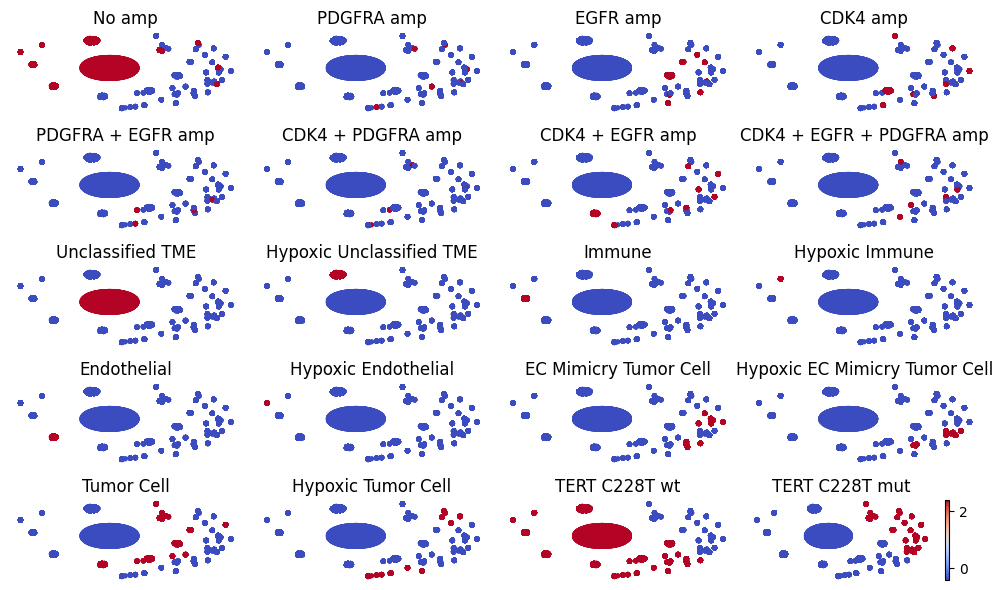

In [399]:


#t-SNE plots
print('All label spread')
#plt.figure(100, figsize=(4,4),dpi=dpi_set)
#plt.axis('off')

cols = np.int64(len(y_marker)/5)

fig = plt.figure()
cc = 0
for m in range(len(y_marker)):
    print(m)
    #if (m < len(y_marker)):
    ax1 = fig.add_subplot(5,cols,m+1)
    plt.scatter(X_2d_all[:,0], X_2d_all[:,1], c=scaled_X[:,m],   s=15,linewidths=0, cmap='coolwarm')
    plt.axis('off')
    plt.title(y_marker[m])
plt.colorbar()

file_name = os.path.join(data_path_output + '/figures/'+'all_label_distribution.png')
plt.savefig(file_name,dpi=150)



In [396]:
df_data = pd.DataFrame(np.array(X_2d_all))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'X2d_all.csv'), header=None, index=None)

df_data = pd.DataFrame(np.array(cluster_asgn_all))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'cluster_asgn_all.csv'), header=None, index=None)


##### 3. Hierarchical clustering - another option

In [405]:
'''
Since hierarchical clustering uses Euclidean distance, which is very sensitive to dealing with variables with different scales, 
we rescale all the variables before computing the distance. 
'''

from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()

scaled_data = data_scaler.fit_transform(matrix_all)
scaled_data.shape

(20277, 20)

In [408]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

In [ ]:
dendrogram(complete_clustering)
plt.show()

In [ ]:
dendrogram(average_clustering)
plt.show()

In [ ]:
dendrogram(single_clustering)
plt.show()

##### 4. Remove 0th cluster and repeat clustering

In [412]:
row_id_0 = np.array(np.where(cluster_asgn_all==(0))).flatten()
#plt.scatter(X_2d_ss[ data_CM_spat_ss[:,8]==(label), 0], X_2d_ss[ data_CM_spat_ss[:,8]==(label), 1], color=c,label=label,s=1,linewidths=0,alpha=0.9)
print(row_id_0.shape)

(10711,)


In [414]:
matrix_all_redu = np.delete(matrix_all,(row_id_0),axis=0)
print(matrix_all_redu.shape)

(9566, 20)


In [440]:
communities, graph, Q = pg.cluster(matrix_all_redu, k =100)#, min_cluster_size=1)#,k=500)
cluster_asgn_all_redu = communities

Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.770211935043335 seconds
Jaccard graph constructed in 3.3161120414733887 seconds
Wrote graph to binary file in 0.6647441387176514 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.910685
Louvain completed 21 runs in 3.452514886856079 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 10.534096002578735 seconds


In [427]:
M = matrix_all_redu 

num_cells = M.shape[0]
num_genes = M.shape[1]



In [428]:
#tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=250)
X_2d_all_redu = TSNE().fit(M)


unique [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
counts [1604 1052  842  809  791  766  585  333  287  281  274  263  236  224
  192  177  169  159  135  124  115   68   52   28]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


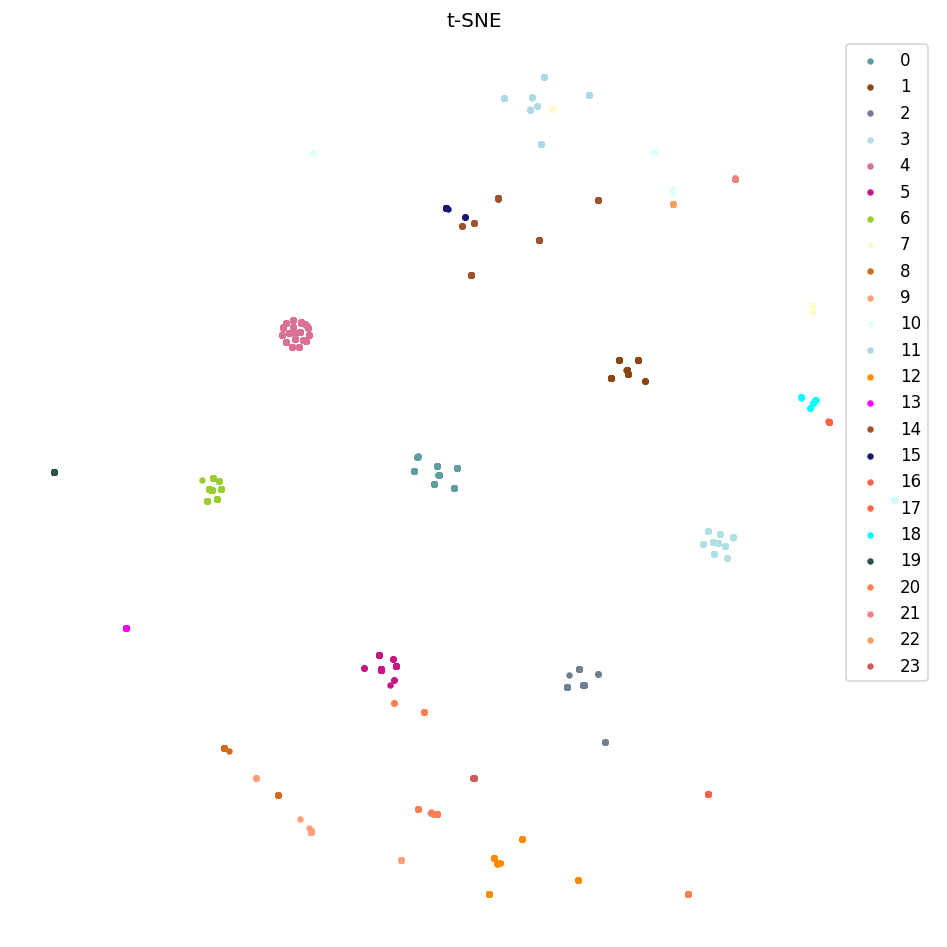

In [451]:
unique, counts = np.unique(cluster_asgn_all_redu, return_counts=True)
print('unique',str(unique))
print('counts',str(counts))
#
#t-SNE plots
target_ids = range(len(unique))
plt.figure(figsize=(8,8),frameon=False,dpi=120)
plt.axis('off')

for i,  label in zip(target_ids,  unique):
    print(label)
    c=colours_41[i]
    plt.scatter(X_2d_all_redu[ cluster_asgn_all_redu==(i), 0], X_2d_all_redu[ cluster_asgn_all_redu==(i), 1], color=c,label=label,s=15,linewidths=0)
plt.legend()
plt.title('t-SNE')
#plt.show()
file_name = os.path.join(data_path_output + '/figures/'+'cluster_all_reduced.png')
plt.savefig(file_name,dpi=150)

In [452]:
scaled_X = zscore(matrix_all_redu,axis=1)
y_marker=flat_list

All label spread


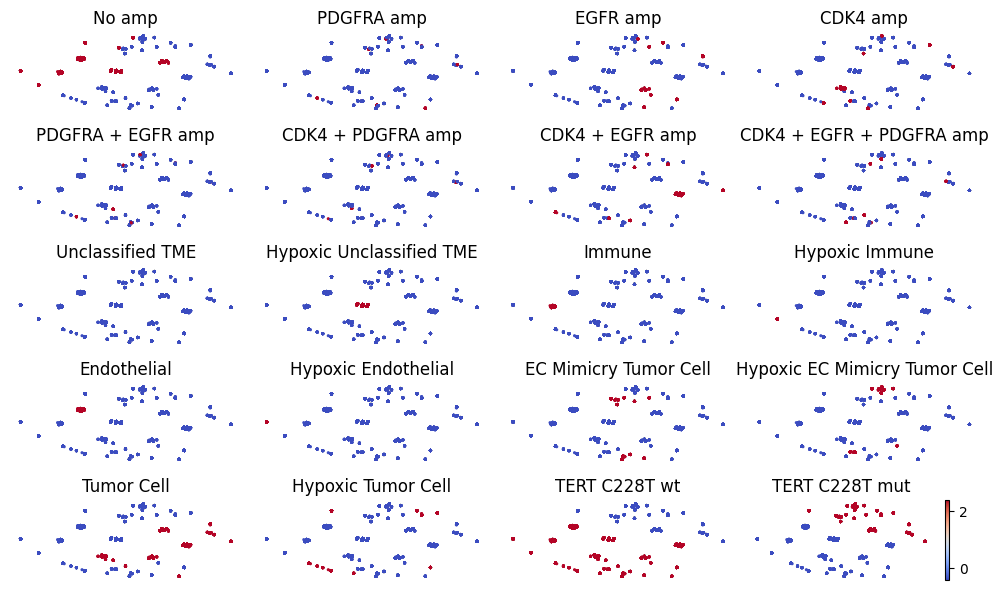

In [453]:


#t-SNE plots
print('All label spread')
#plt.figure(100, figsize=(4,4),dpi=dpi_set)
#plt.axis('off')

cols = np.int64(len(y_marker)/5)

fig = plt.figure()
cc = 0
for m in range(len(y_marker)):
    #print(m)
    #if (m < len(y_marker)):
    ax1 = fig.add_subplot(5,cols,m+1)
    plt.scatter(X_2d_all_redu[:,0], X_2d_all_redu[:,1], c=scaled_X[:,m],   s=5,linewidths=0, cmap='coolwarm')
    plt.axis('off')
    plt.title(y_marker[m])
plt.colorbar()

file_name = os.path.join(data_path_output + '/figures/'+'all_label_distribution_reduced.png')
plt.savefig(file_name,dpi=150)



In [458]:
df_data = pd.DataFrame(np.array(matrix_all))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'matrix_all.csv'), header=None, index=None)

df_data = pd.DataFrame(np.array(cluster_asgn_all_redu))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'matrix_all_reduced.csv'), header=None, index=None)

df_data = pd.DataFrame(np.array(X_2d_all_redu))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'X2d_all_reduced.csv'), header=None, index=None)

df_data = pd.DataFrame(np.array(cluster_asgn_all_redu))
df_data.to_csv(os.path.join(data_path_output + '/cluster/'+'cluster_asgn_all_reduced.csv'), header=None, index=None)


unique [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 180 but corresponding boolean dimension is 9566

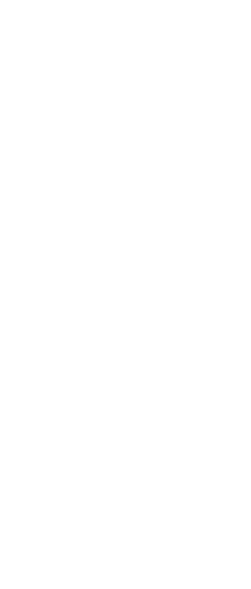

In [455]:
plt.rcParams["figure.figsize"] = [10,6]
plt.rcParams["figure.autolayout"] = True


plt.subplot(1,4,1)
unique, counts = np.unique(cluster_asgn_mn, return_counts=True)
print('unique',str(unique))
#colo_muta=['gold','magenta','dodgerblue']
#t-SNE plots
target_ids = range(len(unique))
#plt.figure(100,figsize=(5,6),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    #print(label)
    c=colo_muta[i] #cm.colors[i]
    plt.scatter(X_2d_mn[ cluster_asgn_mn==(i), 0], X_2d_mn[ cluster_asgn_mn==(i), 1], color=c,label=label,s=15,linewidths=0)
plt.legend()
plt.title('mutation t-SNE')
#plt.show()

plt.subplot(1,4,2)
unique, counts = np.unique(cluster_asgn_pn, return_counts=True)
print('unique',str(unique))
#colo_muta=['gold','magenta','dodgerblue']
#t-SNE plots
target_ids = range(len(unique))
#plt.figure(200,figsize=(5,6),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    #print(label)
    c=colo_pheno[i] #cm.colors[i]
    plt.scatter(X_2d_mn[ cluster_asgn_pn==(i), 0], X_2d_mn[ cluster_asgn_pn==(i), 1], color=c,label=label,s=15,linewidths=0)
plt.legend()
plt.title(' phenoclusters')
#plt.show()


plt.subplot(1,4,3)
unique, counts = np.unique(cluster_asgn_gn, return_counts=True)
print('unique',str(unique))
#colo_geno=['gold','magenta','dodgerblue']
#t-SNE plots
target_ids = range(len(unique))
#plt.figure(300, figsize=(5,6),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    #print(label)
    c=colo_geno[i] #cm.colors[i]
    plt.scatter(X_2d_mn[ cluster_asgn_gn==(i), 0], X_2d_mn[ cluster_asgn_gn==(i), 1], color=c,label=label,s=15,linewidths=0)
plt.legend()
plt.title(' genoclusters')
#plt.show()


plt.subplot(1,4,4)
unique, counts = np.unique(image_ids , return_counts=True)
print('unique',str(unique))
#cm = plt.cm.get_cmap('tab20c', len(unique))
#t-SNE plots
target_ids = range(len(unique))
#plt.figure(300, figsize=(5,6),frameon=False,dpi=100)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    print(label)
    s=np.array(np.where(image_ids==i)).flatten()
    print(s)
    plt.scatter(X_2d_mn[ s, 0],X_2d_mn[ s, 1], color=colours_33[i],label=label,s=15,linewidths=0)
plt.legend(fontsize='xx-small')
plt.title('image ids')

file_name = os.path.join(data_path_output + '/figures/'+'cluster_muta_comp.png')
plt.savefig(file_name,dpi=150)